In [7]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt
import urllib3
import json
import base64
import sys


In [12]:
openApiURL = "http://aiopen.etri.re.kr:8000/HumanStatus"   # API 연결 URL
accessKey = "fdf16766-d73d-48be-a4b3-c03276a6cfb2"       # 사용자 인증키
imageFilePath = "./data/pa2.jpg"                        # 대상 이미지
type = "jpg"                # 이미지 타입

# 이미지 파일 읽어와 디코딩 하기
file = open(imageFilePath, "rb")
imageContents = base64.b64encode(file.read()).decode("utf8")
file.close()

# 딕셔너리 구조의 인증 및 요청 구조 만들기
requestJson = {
    "access_key": accessKey,
    "argument": {
        "type": type,
        "file": imageContents
    }
}

http = urllib3.PoolManager()
response = http.request("POST", openApiURL,
                        headers={"Content-Type": "application/json; charset=UTF-8"},
                        body=json.dumps(requestJson))


if response.status != 200:
    sys.exit('데이터를 받지 못했습니다.')
    
json_data = json.loads(response.data)

In [15]:
json_data['return_object'][0]['data'][1]

{'class': 'Sitting',
 'confidence': '0.9124167561531067',
 'x': 47.195274353027344,
 'y': 170.45770263671875,
 'width': 70.56778717041016,
 'height': 87.31787109375}

In [18]:
len(json_data['return_object'][0]['data'])
json_data['return_object'][0]['data'][0]

'/home/deepview/ai-human-status-detect/src/../upload/87420d18-73d6-46de-ba27-13697efb5104/0.png'

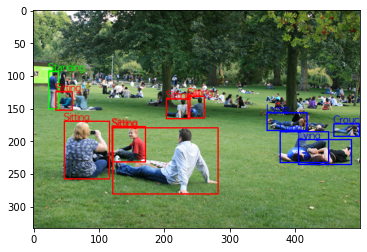

In [20]:
img = Image.open(imageFilePath)
font = ImageFont.truetype('AppleGothic', 15)
dImg = ImageDraw.Draw(img)

img_data = json_data['return_object'][0]['data'][1:]

for info_img in img_data:
    gubun = info_img['class']
    x = int(info_img['x'])
    y = int(info_img['y'])
    w = int(info_img['width'])
    h = int(info_img['height'])
    if gubun == 'Standing':
        color = (0, 255, 0)
    elif gubun == 'Sitting':
        color = (255, 0, 0)  # bgr, 선 색 설정
    else:
        color = (0, 0, 255)
    dImg.line([(x, y), (x, y+h), (x+w, y+h), (x+w, y), (x, y)], fill = color, width = 2)
    dImg.text((x, y-15), gubun, font = font, fill = color)
    
plt.imshow(img)